# Sales Analysis

#### Import Necessary Libraries

In [8]:
import pandas as pd
import numpy as np
import glob

#### Merge 12 months of sales data into a single csv file

In [9]:
path = '.\\Sales_Data'

files = glob.glob(path + '\\*.csv')

df_list = []

for file in files:
    df = pd.read_csv(file)
    df_list.append(df)
    
all_months_data = pd.concat(df_list)

all_months_data.to_csv('all_data.csv', index=False)

#### Read from an updated Dataframe

In [10]:
all_data = pd.read_csv('all_data.csv', index_col='Order Date') # Making Order Date as index

### Data Exploration!

In [11]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address
Order Date,,,,,
04/19/19 08:46,176558,USB-C Charging Cable,2,11.95,"917 1st St, Dallas, TX 75001"
NaN,NaN,NaN,NaN,NaN,NaN
04/07/19 22:30,176559,Bose SoundSport Headphones,1,99.99,"682 Chestnut St, Boston, MA 02215"
04/12/19 14:38,176560,Google Phone,1,600,"669 Spruce St, Los Angeles, CA 90001"
04/12/19 14:38,176560,Wired Headphones,1,11.99,"669 Spruce St, Los Angeles, CA 90001"


In [12]:
all_data.tail()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address
Order Date,,,,,
09/17/19 20:56,259353,AAA Batteries (4-pack),3,2.99,"840 Highland St, Los Angeles, CA 90001"
09/01/19 16:00,259354,iPhone,1,700,"216 Dogwood St, San Francisco, CA 94016"
09/23/19 07:39,259355,iPhone,1,700,"220 12th St, San Francisco, CA 94016"
09/19/19 17:30,259356,34in Ultrawide Monitor,1,379.99,"511 Forest St, San Francisco, CA 94016"
09/30/19 00:18,259357,USB-C Charging Cable,1,11.95,"250 Meadow St, San Francisco, CA 94016"


In [13]:
all_data.shape

(186850, 5)

In [14]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Purchase Address    object
dtype: object

In [15]:
len(all_data.index)

186850

##### Our data contains rows with nan values. We need to fix that. Let's dive into it.

#### Drop rows containing NAN

In [16]:
all_data.isna().sum()

# Looks like there are quite a rows containing nan. Let's drop them.

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Purchase Address    545
dtype: int64

In [17]:
all_data = all_data.dropna()
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address
Order Date,,,,,
04/19/19 08:46,176558,USB-C Charging Cable,2,11.95,"917 1st St, Dallas, TX 75001"
04/07/19 22:30,176559,Bose SoundSport Headphones,1,99.99,"682 Chestnut St, Boston, MA 02215"
04/12/19 14:38,176560,Google Phone,1,600,"669 Spruce St, Los Angeles, CA 90001"
04/12/19 14:38,176560,Wired Headphones,1,11.99,"669 Spruce St, Los Angeles, CA 90001"
04/30/19 09:27,176561,Wired Headphones,1,11.99,"333 8th St, Los Angeles, CA 90001"


In [18]:
len(all_data.index)

186305

#### Drop rows containing bogus data!

##### While solving a problem, got to know that some rows contain bogus data! Let's get rid of it!

In [19]:
all_data[all_data.index == 'Order Date']

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address
Order Date,,,,,
Order Date,Order ID,Product,Quantity Ordered,Price Each,Purchase Address
Order Date,Order ID,Product,Quantity Ordered,Price Each,Purchase Address
Order Date,Order ID,Product,Quantity Ordered,Price Each,Purchase Address
Order Date,Order ID,Product,Quantity Ordered,Price Each,Purchase Address
Order Date,Order ID,Product,Quantity Ordered,Price Each,Purchase Address
...,...,...,...,...,...
Order Date,Order ID,Product,Quantity Ordered,Price Each,Purchase Address
Order Date,Order ID,Product,Quantity Ordered,Price Each,Purchase Address
Order Date,Order ID,Product,Quantity Ordered,Price Each,Purchase Address


##### Smart way but took some time!

In [20]:
# Since Order Date(Index also) is a string.
# We made string length of Order Date == 14

all_data = all_data[all_data.index.str.len() == 14]
len(all_data.index)

185950

#### Converting String Index into a datetime index!

In [21]:
type(all_data.index[0])

str

In [22]:
all_data.index = pd.to_datetime(all_data.index, format='%m/%d/%y %H:%M')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address
Order Date,,,,,
2019-04-19 08:46:00,176558,USB-C Charging Cable,2,11.95,"917 1st St, Dallas, TX 75001"
2019-04-07 22:30:00,176559,Bose SoundSport Headphones,1,99.99,"682 Chestnut St, Boston, MA 02215"
2019-04-12 14:38:00,176560,Google Phone,1,600,"669 Spruce St, Los Angeles, CA 90001"
2019-04-12 14:38:00,176560,Wired Headphones,1,11.99,"669 Spruce St, Los Angeles, CA 90001"
2019-04-30 09:27:00,176561,Wired Headphones,1,11.99,"333 8th St, Los Angeles, CA 90001"


In [23]:
type(all_data.index[0])

pandas._libs.tslibs.timestamps.Timestamp

#### Add a new column Total Sales

##### Changing data types of columns

In [24]:
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])

In [25]:
all_data['Total Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Total Sales
Order Date,,,,,,
2019-04-19 08:46:00,176558,USB-C Charging Cable,2,11.95,"917 1st St, Dallas, TX 75001",23.90
2019-04-07 22:30:00,176559,Bose SoundSport Headphones,1,99.99,"682 Chestnut St, Boston, MA 02215",99.99
2019-04-12 14:38:00,176560,Google Phone,1,600.00,"669 Spruce St, Los Angeles, CA 90001",600.00
2019-04-12 14:38:00,176560,Wired Headphones,1,11.99,"669 Spruce St, Los Angeles, CA 90001",11.99
2019-04-30 09:27:00,176561,Wired Headphones,1,11.99,"333 8th St, Los Angeles, CA 90001",11.99


In [26]:
type(all_data['Total Sales'][0])

numpy.float64

#### Add a new column City

##### Extracting City And State from Purchase Address column

In [30]:
# Using apply() method

def get_city(address):
    return address.split(',')[1].lstrip()

def get_state(address):
    return address.split(',')[2].lstrip()[0:2]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: f'{get_city(x)} ({get_state(x)})')

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Total Sales,City
Order Date,,,,,,,
2019-04-19 08:46:00,176558,USB-C Charging Cable,2,11.95,"917 1st St, Dallas, TX 75001",23.90,Dallas (TX)
2019-04-07 22:30:00,176559,Bose SoundSport Headphones,1,99.99,"682 Chestnut St, Boston, MA 02215",99.99,Boston (MA)
2019-04-12 14:38:00,176560,Google Phone,1,600.00,"669 Spruce St, Los Angeles, CA 90001",600.00,Los Angeles (CA)
2019-04-12 14:38:00,176560,Wired Headphones,1,11.99,"669 Spruce St, Los Angeles, CA 90001",11.99,Los Angeles (CA)
2019-04-30 09:27:00,176561,Wired Headphones,1,11.99,"333 8th St, Los Angeles, CA 90001",11.99,Los Angeles (CA)


#### Add Hour and Minute Column

In [33]:
all_data['Hour'] = all_data.index.hour
all_data['Minute'] = all_data.index.minute

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Total Sales,City,Hour,Minute
Order Date,,,,,,,,,
2019-04-19 08:46:00,176558,USB-C Charging Cable,2,11.95,"917 1st St, Dallas, TX 75001",23.90,Dallas (TX),8,46
2019-04-07 22:30:00,176559,Bose SoundSport Headphones,1,99.99,"682 Chestnut St, Boston, MA 02215",99.99,Boston (MA),22,30
2019-04-12 14:38:00,176560,Google Phone,1,600.00,"669 Spruce St, Los Angeles, CA 90001",600.00,Los Angeles (CA),14,38
2019-04-12 14:38:00,176560,Wired Headphones,1,11.99,"669 Spruce St, Los Angeles, CA 90001",11.99,Los Angeles (CA),14,38
2019-04-30 09:27:00,176561,Wired Headphones,1,11.99,"333 8th St, Los Angeles, CA 90001",11.99,Los Angeles (CA),9,27


#### Convert Exponential values to numeric

In [27]:
pd.options.display.float_format = '{:.2f}'.format

### Question1. What was the best month for sales? How much was earned that month?

#### Grouping Data By Month Using resample

In [28]:
round(all_data.groupby(all_data.index.month).sum())

# OR

monthly_results = all_data.resample('M').sum()
monthly_results

,Quantity Ordered,Price Each,Total Sales
Order Date,,,
2019-01-31,10862,1803264.98,1813586.44
2019-02-28,13449,2188884.72,2202022.42
2019-03-31,17005,2791207.83,2807100.38
2019-04-30,20558,3367671.02,3390670.24
2019-05-31,18667,3135125.13,3152606.75
2019-06-30,15253,2562025.61,2577802.26
2019-07-31,16072,2632539.56,2647775.76
2019-08-31,13448,2230345.42,2244467.88
2019-09-30,13109,2084992.09,2097560.13


#### Plotting the results

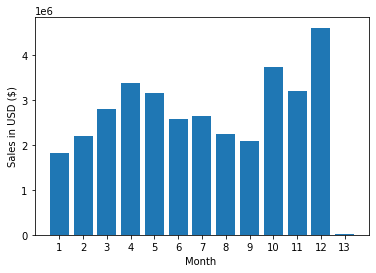

In [29]:
import matplotlib.pyplot as plt

#x axis 
months = range(1,14)

plt.bar(months, monthly_results['Total Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month ')
plt.show()

##### December was the best month for sales. It may be due to christmas as lots of people buy things in this month.

### Q2.Which city had the highest number of sales?

#### Grouping Data By City

In [31]:
city_results = all_data.groupby('City').agg({'Total Sales': 'sum'})
city_results

,Total Sales
City,
Atlanta (GA),2795498.58
Austin (TX),1819581.75
Boston (MA),3661642.01
Dallas (TX),2767975.40
Los Angeles (CA),5452570.80
New York City (NY),4664317.43
Portland (ME),449758.27
Portland (OR),1870732.34
San Francisco (CA),8262203.91


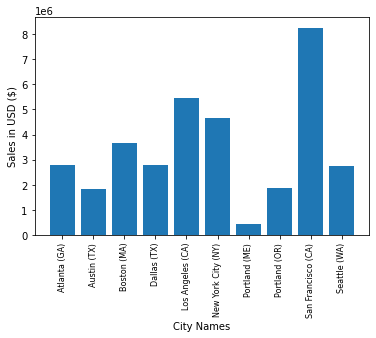

In [32]:
cities = city_results.index

plt.bar(cities, city_results['Total Sales'])
plt.xticks(cities, rotation='vertical', size=8)
plt.ylabel('Sales in USD ($)')
plt.xlabel('City Names')
plt.show()

##### San Francisco had the highest number of sales. It may be due to tech savvy people living there.

### Question3. What time should we display advertisements to maximize likelihood of customer's buying product? 

#### Grouping Data by Hour

In [34]:
hourly_results = all_data.groupby(all_data.index.hour).agg({'Total Sales' : 'count'})
hourly_results.head()

,Total Sales
Order Date,
0,3910
1,2350
2,1243
3,831
4,854


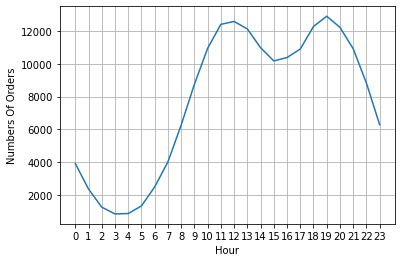

In [35]:
hours = hourly_results.index

plt.plot(hours, hourly_results['Total Sales'])
plt.xticks(hours)
plt.grid()
plt.ylabel('Numbers Of Orders')
plt.xlabel('Hour')
plt.show()

##### Advertisements should be shown before 11am(11) and 7pm(19)

### Question4. What products are most often sold together?

##### The meaty part !!!
##### Getting items which have same order id

In [36]:
# https://stackoverflow.com/questions/43348194/pandas-select-rows-if-id-appear-several-time

df = all_data[all_data['Order ID'].duplicated(keep=False)].copy()
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Total Sales,City,Hour,Minute
Order Date,,,,,,,,,
2019-04-12 14:38:00,176560,Google Phone,1,600.00,"669 Spruce St, Los Angeles, CA 90001",600.00,Los Angeles (CA),14,38
2019-04-12 14:38:00,176560,Wired Headphones,1,11.99,"669 Spruce St, Los Angeles, CA 90001",11.99,Los Angeles (CA),14,38
2019-04-03 19:42:00,176574,Google Phone,1,600.00,"20 Hill St, Los Angeles, CA 90001",600.00,Los Angeles (CA),19,42
2019-04-03 19:42:00,176574,USB-C Charging Cable,1,11.95,"20 Hill St, Los Angeles, CA 90001",11.95,Los Angeles (CA),19,42
2019-04-07 11:31:00,176585,Bose SoundSport Headphones,1,99.99,"823 Highland St, Boston, MA 02215",99.99,Boston (MA),11,31


##### Grouping data by Order ID and joining each group's products by comma so that we could get all the products under an order id within a single row.

In [37]:
# Referenced: https://stackoverflow.com/questions/27298178/concatenate-strings-from-several-rows-using-pandas-groupby

df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

df = df[['Order ID', 'Grouped']].drop_duplicates() # Dropping duplicates and keeping first occurance!

df.head()

,Order ID,Grouped
Order Date,,
2019-04-12 14:38:00,176560,"Google Phone,Wired Headphones"
2019-04-03 19:42:00,176574,"Google Phone,USB-C Charging Cable"
2019-04-07 11:31:00,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
2019-04-10 17:00:00,176586,"AAA Batteries (4-pack),Google Phone"
2019-04-12 11:07:00,176672,"Lightning Charging Cable,USB-C Charging Cable"


##### Counting products in the combinations of 2. Selecting highest occurring product combination i.e Highest Ordered.

In [38]:
# Referenced: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary

from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    
    row_list = row.split(',')
    
    count.update(Counter(combinations(row_list, 2)))
    
for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


##### iPhone and Lightning Charging Cable are the most often sold together.

### Question5. What product sold the most? Why do you think it sold the most?

In [39]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Total Sales,City,Hour,Minute
Order Date,,,,,,,,,
2019-04-19 08:46:00,176558,USB-C Charging Cable,2,11.95,"917 1st St, Dallas, TX 75001",23.90,Dallas (TX),8,46
2019-04-07 22:30:00,176559,Bose SoundSport Headphones,1,99.99,"682 Chestnut St, Boston, MA 02215",99.99,Boston (MA),22,30
2019-04-12 14:38:00,176560,Google Phone,1,600.00,"669 Spruce St, Los Angeles, CA 90001",600.00,Los Angeles (CA),14,38
2019-04-12 14:38:00,176560,Wired Headphones,1,11.99,"669 Spruce St, Los Angeles, CA 90001",11.99,Los Angeles (CA),14,38
2019-04-30 09:27:00,176561,Wired Headphones,1,11.99,"333 8th St, Los Angeles, CA 90001",11.99,Los Angeles (CA),9,27


##### Grouping by Product and taking sum of Quantity Ordered

In [40]:
product_group = all_data.groupby('Product').agg({'Quantity Ordered': 'sum'})

product_group

,Quantity Ordered
Product,
20in Monitor,4129
27in 4K Gaming Monitor,6244
27in FHD Monitor,7550
34in Ultrawide Monitor,6199
AA Batteries (4-pack),27635
AAA Batteries (4-pack),31017
Apple Airpods Headphones,15661
Bose SoundSport Headphones,13457
Flatscreen TV,4819


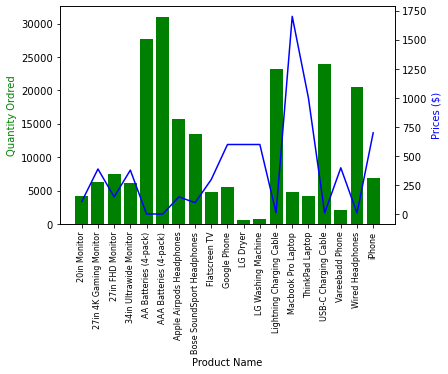

In [41]:
# Referenced: https://stackoverflow.com/questions/14762181/adding-a-y-axis-label-to-secondary-y-axis-in-matplotlib

products = product_group.index

prices = all_data.groupby('Product').agg({'Price Each': 'mean'})

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, product_group['Quantity Ordered'], color='g')
ax2.plot(products, prices, 'b-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordred', color='g')
ax2.set_ylabel('Prices ($)', color='b')
ax1.set_xticklabels(products, rotation='vertical',size=8)

plt.show()

##### It can be inferred that the products with low prices are sold the most!